## Analysis of German bundenliga Football Matches<br>
This project aims to analyse the football matches played at the German Bundesliga corresponding to the 2017 and 2018 season.<br>
The datasets utilized to carry out this analysis were downloaded from the following source:<br>
[**Link**](https://towardsdatascience.com/introduction-to-sports-analytics-with-pandas-ad6303db9e11/)<br>
All the datasets are in JSON format which is very common and easy to read.<br>

The libraries used in this analysis were Numpy and Pandas, both of which belong to Python.

In [1]:
import numpy as np
import pandas as pd

Using the library Pandas, 4 archives in Json Format are uploaded. Each archive contains information about the main events occured per match, all the teams that participated in the ligue, all the players and all the matches that carried out.       

In [2]:
events = pd.read_json("C:\\Users\\Administrador\\Desktop\\Project\\data_sets\\events_Germany.json")
teams = pd.read_json("C:\\Users\\Administrador\\Desktop\\Project\\data_sets\\teams.json")
players = pd.read_json("C:\\Users\\Administrador\\Desktop\\Project\\data_sets\\players.json")
matches = pd.read_json("C:\\Users\\Administrador\\Desktop\\Project\\data_sets\\matches_Germany.json")

The **events** dataframe contains all the information about the actions related to ball touches which made in matches carried out in the German Bundesliga.<br>
This dataframe contains 12 columns which contain the following information:<br>

**id** = a unique identifier for each event.<br>
**eventName** = It contains the type of event that occured. (Pass, Others on the ball, Duel, Interruption, Free Kick, Foul, Shot, Save attempt, Goalkeeper leaving line, Offside)<br>
**eventId** = It is a unique identifier per each type of eventName.<br>
**subEventName** = This column contains sub categories per each eventName.<br>
**subEventId** = It is a unique identifier per each sub category.<br>
**tags** = describe additional information about the event.<br>
**playerId** = contains a code that helps to identify the player involved in the event.<br>
**positions** = The origin and destination positions associated with the event.<br>
**matchId** = is a code that helps to identify the match to which belongs this event.<br>
**teamId** = is a code that helps to identify the player's team who carries out the event.<br>
**matchPeriod** = This column indicates if the event was carried out at the first half (1H), second half (2H), first extra time (E1), second extra time (E2) or penalties time (P).<br>
**eventSec** = This information specifies in seconds when the event occurs. This measurement is tracked since the beginning of the current half of the match.<br> 

In [3]:
events.head(2)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85,179896443


The teams dataframe contains a detailed list about all the teams that have participated in the 7 main soccer competitions (Italian, Spanish, German, French, English First Divisions, World Cup 2018 and European Cup 2016).<br>
This dataframe has 6 columns which contains the following information:<br>
**city**= this column contains the name of the city where a team belongs.<br>
**name**= contains the team's name.<br>
**wyId**= is a unique identifier per each team.<br>
**officialName**= contains the team's official name.<br>
**area**= contains team's additional information.<br>
**type**= indicates the organization's model to which belongs the team.<br>

In [4]:
teams.head(2)

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


The players dataframe is composed by all the information of players which have participated in the 7 main soccer competitions (Italian, Spanish, German, French, English First Divisions, World Cup 2018 and European Cup 2016).<br>
This dataframe contains 14 columns which are described next:<br>
**passportArea**= contains geographic information related to the player's current passport.<br>
**weight**= represents the weight in kilograms of each player.<br>
**firstName**= This column shows the first name of each player.<br>
**middleName** = This column shows the middle name of each player.<br>
**lastName** = This column shows the last name of each player.<br>
**currentTeamId** = This column shows the code of the team to which belongs the player.<br>
**birthDate** = It represents the birthday of each player.<br>
**height**= It represents the height of each player measured in centimeters.<br>
**role**= It represents the main role of player.<br>
**birthArea**= It represents the place where the player was born.<br>
**wyId**= This column shows the codes assigned to each player.<br>
**foot**= The preferred foot of the player.<br>
**shortName**= The short name of the player.<br>
**currentNationalTeamId**= It shows the code of the team where the player currently plays.<br>

In [5]:
players.head(2)

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423


The matches dataframe is composed by all the matches carried out in the German Bundesliga.<br>
This dataframe has 14 columns which are detailed next:<br>
**status**= it presents the final status of the match which can be played, cancelled, postponed or suspended.<br>
**roundId**= indicates the match-day of the competition to which the match belongs to.<br>
**gameweek**= It represents the week of the league, starting from the beginning of the league.<br>
**teamsData**= presents extra information about the teams that are playing the match.<br>
**seasonId**= indicated the season of the match.<br>
**dateutc**= presents the date and time when the match was played.<br>
**winner**= presents the identifier of the team that won. If the match ended with a draw the identifier is 0.<br>
**venue**= The stadium where the match was held.<br>
**wyId**= It's the identifier assigned to the match.<br>
**label**= contains the names of both teams who played the match and the final result.<br>
**date**= The date when the match was held.<br>
**referees**= it contains information about the referees of the match.<br>
**duration**= This column establish 3 possible tags according to the match's duration. The options can be "Regular" (90 minutes), "Extra Time" (Matches with supplementary times) or Penalities (matches which end at penalty kicks).<br>
**competitionId**= This columns presents the identifier of the competition to which belongs the match.<br>

In [6]:
matches.head(2)

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405517,34,"{'2444': {'scoreET': 0, 'coachId': 14710, 'sid...",181137,2018-05-12 13:30:00,2445,Allianz Arena,2517036,"Bayern M\u00fcnchen - Stuttgart, 1 - 4","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 379444, 'role': 'referee'}, {'r...",Regular,426
1,Played,4405517,34,"{'2482': {'scoreET': 0, 'coachId': 272299, 'si...",181137,2018-05-12 13:30:00,2482,WIRSOL Rhein-Neckar-Arena,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 384936, 'role': 'referee'}, {'r...",Regular,426


Before starting the analysis it´s neccessary to check if there are null values and if the datatype is adequate according the information. 

In [7]:
# Here we can observe that there are not null values and the datatype per each column is adequate. 
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519407 entries, 0 to 519406
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   eventId       519407 non-null  int64  
 1   subEventName  519407 non-null  object 
 2   tags          519407 non-null  object 
 3   playerId      519407 non-null  int64  
 4   positions     519407 non-null  object 
 5   matchId       519407 non-null  int64  
 6   eventName     519407 non-null  object 
 7   teamId        519407 non-null  int64  
 8   matchPeriod   519407 non-null  object 
 9   eventSec      519407 non-null  float64
 10  subEventId    519407 non-null  object 
 11  id            519407 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 47.6+ MB


In [8]:
# Here we can observe that there are not null values. The columns dateutc and date are classified as object but this information
# is related to date and time. We are going to fix it. 
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status         306 non-null    object
 1   roundId        306 non-null    int64 
 2   gameweek       306 non-null    int64 
 3   teamsData      306 non-null    object
 4   seasonId       306 non-null    int64 
 5   dateutc        306 non-null    object
 6   winner         306 non-null    int64 
 7   venue          306 non-null    object
 8   wyId           306 non-null    int64 
 9   label          306 non-null    object
 10  date           306 non-null    object
 11  referees       306 non-null    object
 12  duration       306 non-null    object
 13  competitionId  306 non-null    int64 
dtypes: int64(6), object(8)
memory usage: 33.6+ KB


In [9]:
# a copy of matches dataframe is created and it's denominated "matches_2". In this dataframe the change of datatype will carry out. 
matches_2 = matches.copy(deep= True)

In [10]:
# aplying the modifications, the "matches_2" dataframe has the adequate datatype for all columns.
matches_2['dateutc'] = pd.to_datetime(matches_2['dateutc'])
matches_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   status         306 non-null    object        
 1   roundId        306 non-null    int64         
 2   gameweek       306 non-null    int64         
 3   teamsData      306 non-null    object        
 4   seasonId       306 non-null    int64         
 5   dateutc        306 non-null    datetime64[ns]
 6   winner         306 non-null    int64         
 7   venue          306 non-null    object        
 8   wyId           306 non-null    int64         
 9   label          306 non-null    object        
 10  date           306 non-null    object        
 11  referees       306 non-null    object        
 12  duration       306 non-null    object        
 13  competitionId  306 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(7)
memory usage: 33.6+ KB


In [11]:
# Here we can observe that there are not null values but exists a column "birthDate" which requires a change of the datatype.
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   passportArea           3603 non-null   object
 1   weight                 3603 non-null   int64 
 2   firstName              3603 non-null   object
 3   middleName             3603 non-null   object
 4   lastName               3603 non-null   object
 5   currentTeamId          3512 non-null   object
 6   birthDate              3603 non-null   object
 7   height                 3603 non-null   int64 
 8   role                   3603 non-null   object
 9   birthArea              3603 non-null   object
 10  wyId                   3603 non-null   int64 
 11  foot                   3603 non-null   object
 12  shortName              3603 non-null   object
 13  currentNationalTeamId  3603 non-null   object
dtypes: int64(3), object(11)
memory usage: 394.2+ KB


In [12]:
## Applying the same steps described lines above, the column "birthday" has the adequate datatype.
players_2 = players.copy(deep= True)
players_2['birthDate'] = pd.to_datetime(players_2['birthDate'])
players_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passportArea           3603 non-null   object        
 1   weight                 3603 non-null   int64         
 2   firstName              3603 non-null   object        
 3   middleName             3603 non-null   object        
 4   lastName               3603 non-null   object        
 5   currentTeamId          3512 non-null   object        
 6   birthDate              3603 non-null   datetime64[ns]
 7   height                 3603 non-null   int64         
 8   role                   3603 non-null   object        
 9   birthArea              3603 non-null   object        
 10  wyId                   3603 non-null   int64         
 11  foot                   3603 non-null   object        
 12  shortName              3603 non-null   object        
 13  cur

In [13]:
# Here we can observe that neither there are null values nor columns with an inadequate datatype.  
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          142 non-null    object
 1   name          142 non-null    object
 2   wyId          142 non-null    int64 
 3   officialName  142 non-null    object
 4   area          142 non-null    object
 5   type          142 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.8+ KB


## Analysis of the information

The following analysis will be based on the 2017-2018 matches.<br>

In [14]:
(matches_2['dateutc'].dt.year).unique()

array([2018, 2017], dtype=int32)

### Question 1
Using the events, teams and players_2 dataframes, we are going to respond the following question:<br>
which are the top-5 teams with the highest average number of passes per match?

In [15]:
events_df = pd.merge(events, teams[['name','wyId']], how= 'inner', left_on= 'teamId', right_on= 'wyId')
events_df.rename(columns={'name':'TeamName'}, inplace= True)
events_df.drop(labels= 'wyId', axis= 1, inplace= True)
events_df.head(3)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,TeamName
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442,Bayer Leverkusen
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85,179896443,Bayer Leverkusen
2,8,Simple pass,[{'id': 1801}],14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739,Pass,2446,1H,6.946706,85,179896444,Bayer Leverkusen


In [16]:
players_2.columns

Index(['passportArea', 'weight', 'firstName', 'middleName', 'lastName',
       'currentTeamId', 'birthDate', 'height', 'role', 'birthArea', 'wyId',
       'foot', 'shortName', 'currentNationalTeamId'],
      dtype='object')

In [17]:
events_df = pd.merge(events_df, players_2[['wyId', 'shortName', 'firstName']], how= 'inner', left_on= 'playerId', right_on= 'wyId')
events_df.rename(columns= {'shortName':'PlayerName', 'firstName':'PlayerFname'})
events_df.drop(labels= 'wyId', axis= 1, inplace= True)
events_df.head(2)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,TeamName,shortName,firstName
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442,Bayer Leverkusen,K. Volland,Kevin
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85,179896443,Bayer Leverkusen,K. Bellarabi,Karim


### Result of the question 1

In [18]:
passes_by_match_team = (events_df[events_df['eventName'] == 'Pass']).groupby(['TeamName', 'matchId'])['eventName'].count()
passes_by_match_team = passes_by_match_team.reset_index()
passes_by_match_team.rename(columns={'eventName':'Number_of_passes'}, inplace= True)
passes_by_match_team.groupby('TeamName')['Number_of_passes'].mean().reset_index().round(0).sort_values(
    by = 'Number_of_passes', ascending = False).head(5)

,TeamName,Number_of_passes
2,Bayern M\u00fcnchen,648.0
3,Borussia Dortmund,536.0
1,Bayer Leverkusen,479.0
4,Borussia M'gladbach,470.0
13,RB Leipzig,465.0


**Result**<br>
Bayern Munich has the best average number of passes followed by Borussia Dortmund in the 2017-2018 season.

### Question 2:<br>
The lenght of a pass is a really important variable which allows us to understand how a team poses its strategy and even more important<br>
which player completes the most of these passes correctly; therefore this analysis wants to pose the following question:<br>
which are the top-5 players who made more passes correctly and the average length of these passes?<br>

In [19]:
# Using the pythagorean theorem and the data related to the initial and final position of a pass is possible to calculate the distance between
# these points. Using the "positions" column the distance of a pass will be calculated.
# Applying a filter we only save the information related to passes into the "passes" dataframe.
passes = events[events['eventName'] == 'Pass'].reset_index(drop= True)
passes.head(5)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85,179896443
2,8,Simple pass,[{'id': 1801}],14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739,Pass,2446,1H,6.946706,85,179896444
3,8,Simple pass,[{'id': 1801}],14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739,Pass,2446,1H,10.786491,85,179896445
4,8,Simple pass,[{'id': 1801}],14803,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",2516739,Pass,2446,1H,12.684514,85,179896446


In [20]:
# 
import numpy as np
distance = []
for i in range(len(passes)):
    value = np.sqrt((passes.positions[i][0]['x'] - passes.positions[i][1]['x'])**2 + (passes.positions[i][0]['y'] - passes.positions[i][1]['y'])**2) 
    distance.append(value)
passes["pass_lenght"] = distance
passes.head(2)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,pass_lenght
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442,2.000000
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85,179896443,38.209946


In [21]:
players.head(1)

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687


In [22]:
passes = pd.merge(passes, players[['wyId', 'shortName']], how= 'inner', left_on= 'playerId', right_on= 'wyId')
passes.head(2)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,pass_lenght,wyId,shortName
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442,2.000000,15231,K. Volland
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85,179896443,38.209946,14786,K. Bellarabi


### Result of the Question 2

In [23]:
# Top-5 players with the longest passes  
longest_passes = passes.groupby('shortName')['pass_lenght'].agg(['count', 'mean']).sort_values(by = 'mean', ascending = False).reset_index().round(1)[0:5].rename(
    columns = {'count':'# of passes', 'mean':'Mean_Lenght_of_passes'})
longest_passes

,shortName,# of passes,Mean_Lenght_of_passes
0,J. Villalba,3,46.0
1,R. Gikiewicz,40,44.8
2,R. Jarstein,738,44.0
3,A. N\u00fcbel,13,43.9
4,T. Horn,629,43.4


In [24]:
# The opr-5 players with the most number of passes.
number_passes = passes.groupby('shortName')['pass_lenght'].agg(['count', 'mean']).sort_values(by = 'count', ascending = False).reset_index().round(1)[0:5].rename(
    columns = {'count':'# of passes', 'mean':'Mean_Lenght_of_passes'})
number_passes

,shortName,# of passes,Mean_Lenght_of_passes
0,K. Vogt,2125,29.0
1,D. Demme,1957,22.4
2,M. Hummels,1929,27.8
3,M. Ginter,1922,26.6
4,J. Kimmich,1854,24.3


The 2 tables above show the top-5 players ordered by complete passes' number and by mean lenght of the passes.<br>

### Question 3<br>
Earlier we have evaluated the number of completed passes per player, obtaining a top-5 player dataframe. Taking this background <br>
we are going to compare the number of completed passes per win and not-win matches. As case of study, B. Leverkusen is the chosen team for this task.<br> 

In [25]:
matches.head(1)

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405517,34,"{'2444': {'scoreET': 0, 'coachId': 14710, 'sid...",181137,2018-05-12 13:30:00,2445,Allianz Arena,2517036,"Bayern M\u00fcnchen - Stuttgart, 1 - 4","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 379444, 'role': 'referee'}, {'r...",Regular,426


In [26]:
events.head(1)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442


In [27]:
# first, I add to the "events" dataframe a new column which points out the winner team per match. 
events_matches = pd.merge(events, matches[['wyId', 'winner']], how= 'inner', left_on= 'matchId', right_on= 'wyId')
events_matches.drop('wyId', axis = 1, inplace = True)
events_matches.head(3)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,winner
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442,2444
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85,179896443,2444
2,8,Simple pass,[{'id': 1801}],14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739,Pass,2446,1H,6.946706,85,179896444,2444


In [28]:
# I need to know which is the code for B. Leverkusen team.
unique_teams = teams[['wyId', 'officialName']].drop_duplicates()
unique_teams[unique_teams['officialName'].str.contains('Lever')]
# The ID of B. Leverkusen is 2446

,wyId,officialName
29,2446,TSV Bayer 04 Leverkusen


In [29]:
# the "events_matches" dataframe is filtered in order to obtain information of B. Leverkusen Team which has the teamID 2446.  
# a new dataframe called "only_b_leverkusen" is created. 
only_b_leverkusen = events_matches[events_matches['teamId'] == 2446]
only_b_leverkusen.head(3)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,winner
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442,2444
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85,179896443,2444
2,8,Simple pass,[{'id': 1801}],14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739,Pass,2446,1H,6.946706,85,179896444,2444


In [30]:
# Applying filters to the "only_b_leverkusen"dataframe, it's possible to obtain the won matches by B. Leverkusen where the event name
# is "Pass". This dataframe is stored in "win_matches" dataframe.
win_matches = only_b_leverkusen[(only_b_leverkusen['eventName'] == 'Pass') & (only_b_leverkusen['winner'] == 2446)]
win_matches

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,winner
54048,8,Simple pass,[{'id': 1802}],425925,"[{'y': 91, 'x': 77}, {'y': 86, 'x': 88}]",2516772,Pass,2446,1H,30.496267,85,188292915,2446
54056,8,Simple pass,[{'id': 1801}],14786,"[{'y': 92, 'x': 75}, {'y': 87, 'x': 74}]",2516772,Pass,2446,1H,39.315385,85,188292922,2446
54057,8,Simple pass,[{'id': 1801}],165425,"[{'y': 87, 'x': 74}, {'y': 84, 'x': 81}]",2516772,Pass,2446,1H,39.694139,85,188292923,2446
54058,8,Head pass,[{'id': 1801}],15231,"[{'y': 84, 'x': 81}, {'y': 40, 'x': 42}]",2516772,Pass,2446,1H,40.697846,82,188292925,2446
54070,8,Simple pass,[{'id': 1801}],344178,"[{'y': 79, 'x': 36}, {'y': 93, 'x': 40}]",2516772,Pass,2446,1H,73.176632,85,188292939,2446
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514515,8,Simple pass,[{'id': 1801}],388267,"[{'y': 13, 'x': 76}, {'y': 45, 'x': 71}]",2517041,Pass,2446,2H,2711.574301,85,251202905,2446
514528,8,Simple pass,"[{'id': 1401}, {'id': 1801}]",40657,"[{'y': 12, 'x': 28}, {'y': 22, 'x': 64}]",2517041,Pass,2446,2H,2794.016952,85,251202908,2446
514547,8,Simple pass,[{'id': 1801}],212604,"[{'y': 74, 'x': 36}, {'y': 61, 'x': 45}]",2517041,Pass,2446,2H,2879.058911,85,251202916,2446
514548,8,High pass,[{'id': 1801}],165425,"[{'y': 61, 'x': 45}, {'y': 12, 'x': 59}]",2517041,Pass,2446,2H,2881.593966,83,251202917,2446


In [31]:
# Applying filters to the "only_b_leverkusen"dataframe, it's possible to obtain the not-won matches by B. Leverkusen where the event name
# is "Pass". This dataframe is stored in "not_win_matches" dataframe.
not_win_matches = only_b_leverkusen[(only_b_leverkusen['eventName'] == 'Pass') & (only_b_leverkusen['winner'] != 2446)]
not_win_matches

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,winner
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442,2444
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85,179896443,2444
2,8,Simple pass,[{'id': 1801}],14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739,Pass,2446,1H,6.946706,85,179896444,2444
3,8,Simple pass,[{'id': 1801}],14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739,Pass,2446,1H,10.786491,85,179896445,2444
4,8,Simple pass,[{'id': 1801}],14803,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",2516739,Pass,2446,1H,12.684514,85,179896446,2444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496002,8,Simple pass,[{'id': 1801}],425925,"[{'y': 87, 'x': 93}, {'y': 92, 'x': 84}]",2517030,Pass,2446,2H,2825.823625,85,249320111,0
496004,8,Cross,"[{'id': 402}, {'id': 801}, {'id': 1801}]",146583,"[{'y': 92, 'x': 84}, {'y': 58, 'x': 93}]",2517030,Pass,2446,2H,2827.760659,80,249320112,0
496008,8,Simple pass,"[{'id': 1401}, {'id': 1801}]",258253,"[{'y': 48, 'x': 74}, {'y': 39, 'x': 66}]",2517030,Pass,2446,2H,2830.694903,85,249320114,0
496009,8,Simple pass,[{'id': 1801}],15188,"[{'y': 39, 'x': 66}, {'y': 15, 'x': 79}]",2517030,Pass,2446,2H,2833.965772,85,249320115,0


In [32]:
# finally, the win_matches dataframe is summarized; presenting a table with the matchID code and the number of total passes per match.
summary_win_matches = win_matches.groupby(by= 'matchId')['eventName'].count().reset_index()
summary_win_matches

,matchId,eventName
0,2516772,611
1,2516789,379
2,2516814,377
3,2516825,585
4,2516852,437
5,2516873,368
6,2516879,384
7,2516902,557
8,2516916,643
9,2516944,426


In [33]:
# finally, the not_win_matches dataframe is summarized; presenting a table with the matchID code and the number of total passes per match.
summary_not_win_matches = not_win_matches.groupby(by= 'matchId')['eventName'].count().reset_index()
summary_not_win_matches

,matchId,eventName
0,2516739,459
1,2516753,514
2,2516764,522
3,2516776,626
4,2516797,497
5,2516807,395
6,2516835,481
7,2516843,405
8,2516862,250
9,2516890,353


### Results of the Question 3

In [34]:
summary_win_matches['eventName'].describe().reset_index()

,index,eventName
0,count,15.000000
1,mean,483.000000
2,std,89.121907
3,min,368.000000
4,25%,405.000000
5,50%,492.000000
6,75%,541.000000
7,max,643.000000


In [35]:
summary_not_win_matches['eventName'].describe().reset_index()

,index,eventName
0,count,19.000000
1,mean,475.105263
2,std,93.357077
3,min,250.000000
4,25%,417.500000
5,50%,497.000000
6,75%,518.500000
7,max,632.000000


For comparing both results a box plot will be utilized. 

C:\Users\Administrador\AppData\Local\Temp\ipykernel_23512\1255599071.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes.boxplot([summary_win_matches['eventName'], summary_not_win_matches['eventName']], labels=['Win Matches', 'Not Win Matches'])


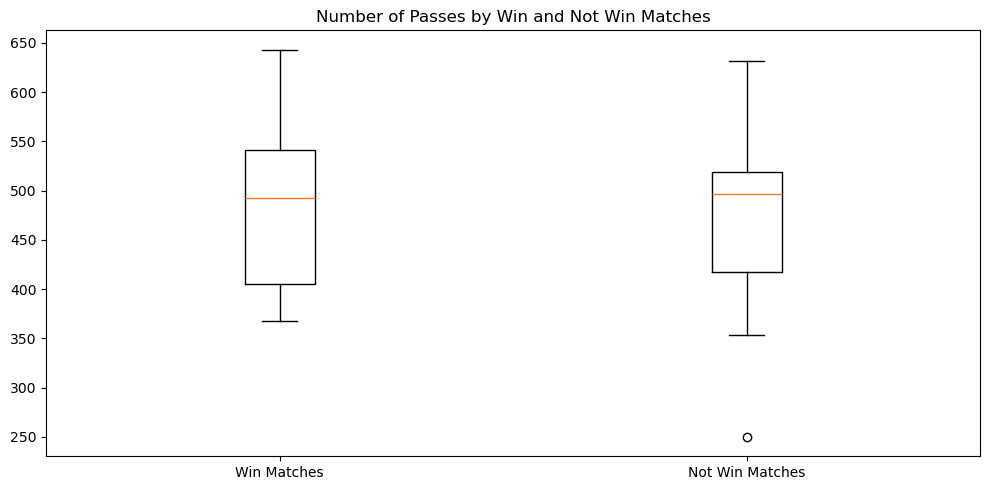

In [38]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize = (10, 5))
axes.boxplot([summary_win_matches['eventName'], summary_not_win_matches['eventName']], labels=['Win Matches', 'Not Win Matches'])
axes.set_title('Number of Passes by Win and Not Win Matches')
plt.tight_layout()
plt.show()

In [42]:
# Calculating the Interquartile Range for both dataframes
import numpy as np
def iqr(x):
    valor = np.quantile(a= x, q= 0.75) - np.quantile(a= x, q= 0.25)
    return valor

136.0


In [43]:
# IQR for number of passes of win matches
print('IQR for win matches=', iqr(summary_win_matches['eventName']))

IQR for win matches= 136.0


In [44]:
# IQR for number of passes of not win matches
print('IQR for not win matches=', iqr(summary_not_win_matches['eventName']))

IQR for not win matches= 101.0


The difference is small among both interquartile ranges (136 vs. 101) which could tell us that the spread of 50 % of the observations is almost<br>
the same but could affect slightly the difference between the mean and median.<br>

Looking at both box plots, There is a slight difference of the spread among both graphs. The observations of number of passes per win matches are<br> more spread out than the observations of not win matches; this difference affects directly the mean and median.<br>

Finally, comparing parameters like mean and median for both cases (number of passes by win and not win matches), there is a sligh difference :<br>
Mean :
Number of passes of win matches : 483 passes
Number of passes of not win matches : 475 passes
Median :
Number of passes of win matches : 492 passes
Number of passes of not win matches : 497 passes

In conclusion, the number of passes isn't apparently a variable which affect the success of a match given that the difference between the number of<br> passes of win mathes and the number of passes of not win matches is slightly different.